# Choix

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
countries = pd.read_csv("./Data/EdStatsCountry.csv")
data = pd.read_csv("./Data/EdStatsData.csv")
series = pd.read_csv("./Data/EdStatsSeries.csv")

p = pd.read_csv("./Data/Pays.csv")

In [3]:
# Dimensions des Dataframes

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

Liste des indicateurs nécessaires

In [4]:
ind = ["SP.POP.TOTL",
      "SP.POP.1524.TO.UN",
      "SE.COM.DURS",
      "NY.GDP.PCAP.CD",
      "NY.GNP.PCAP.CD",
      "PRJ.MYS.25UP.MF",  
      "IT.NET.USER.P2", 
      "PRJ.ATT.1519.3.MF", 
      "PRJ.ATT.2024.3.MF",
      "PRJ.ATT.2024.4.MF",
      "PRJ.POP.ALL.3.MF",
      "PRJ.POP.ALL.4.MF"]



Filtrage des données

<AxesSubplot:>

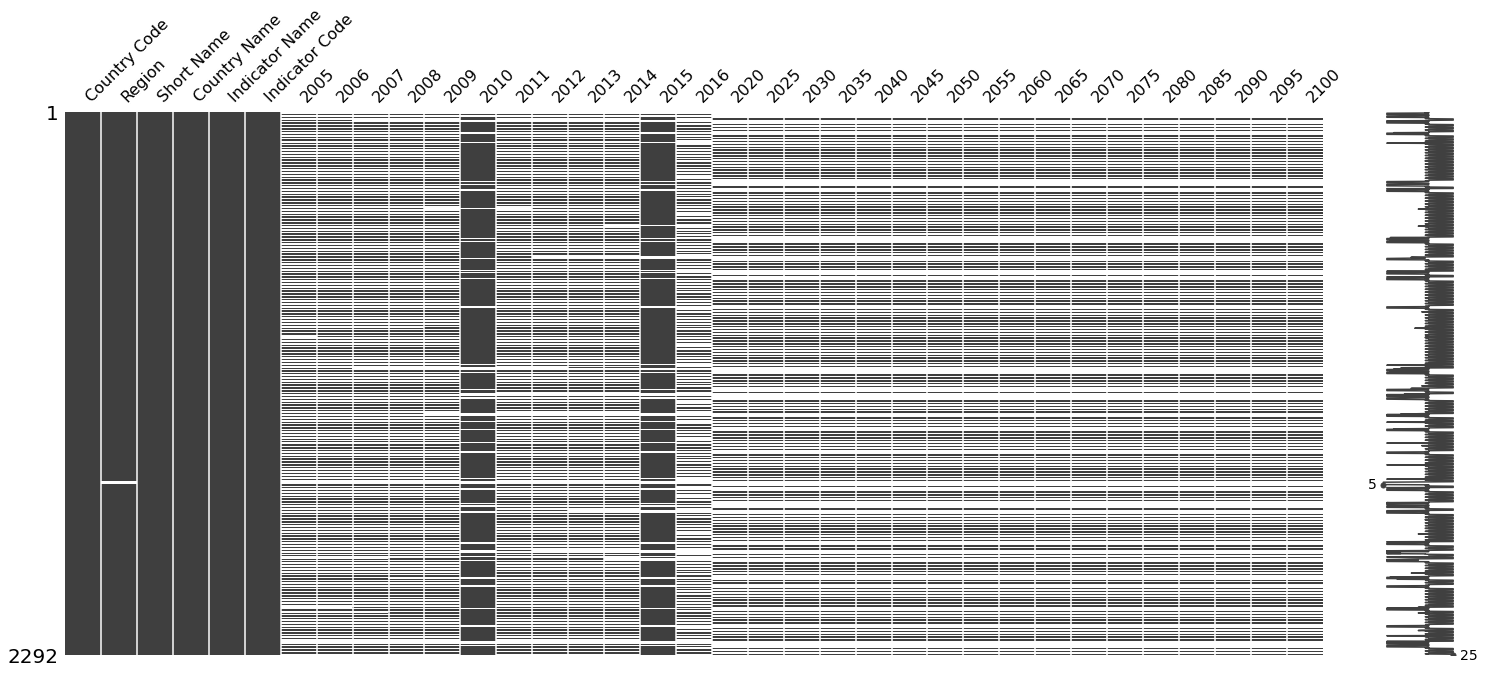

In [5]:
data_idh = data.copy() #Création d'une copie
un_countries = countries.loc[countries["Short Name"].isin(p["Name"])] #Filtrage des pays dans countries
data_idh = data_idh.loc[data_idh['Country Code'].isin(un_countries['Country Code'])] #Filtrage des pays dans Data
data_idh = data_idh.loc[data_idh["Indicator Code"].isin(ind)] #Filtrage des indicateurs
years=[]
for n in range(1970, 2005):
    years.append(str(n))
    
data_idh.drop(years,axis=1,inplace=True) #Filtrage des années
data_idh.dropna(thresh=(0.1*data_idh.shape[0]), axis=1, inplace =True) #Suppression des colonnes avec au moins 10% de valeur manquantes
country_bis = un_countries[['Country Code','Region', 'Short Name']] 
data_idh =pd.merge(country_bis, data_idh, on="Country Code") #Association des Régions 
msno.matrix(data_idh)

Mise en forme des données

<AxesSubplot:>

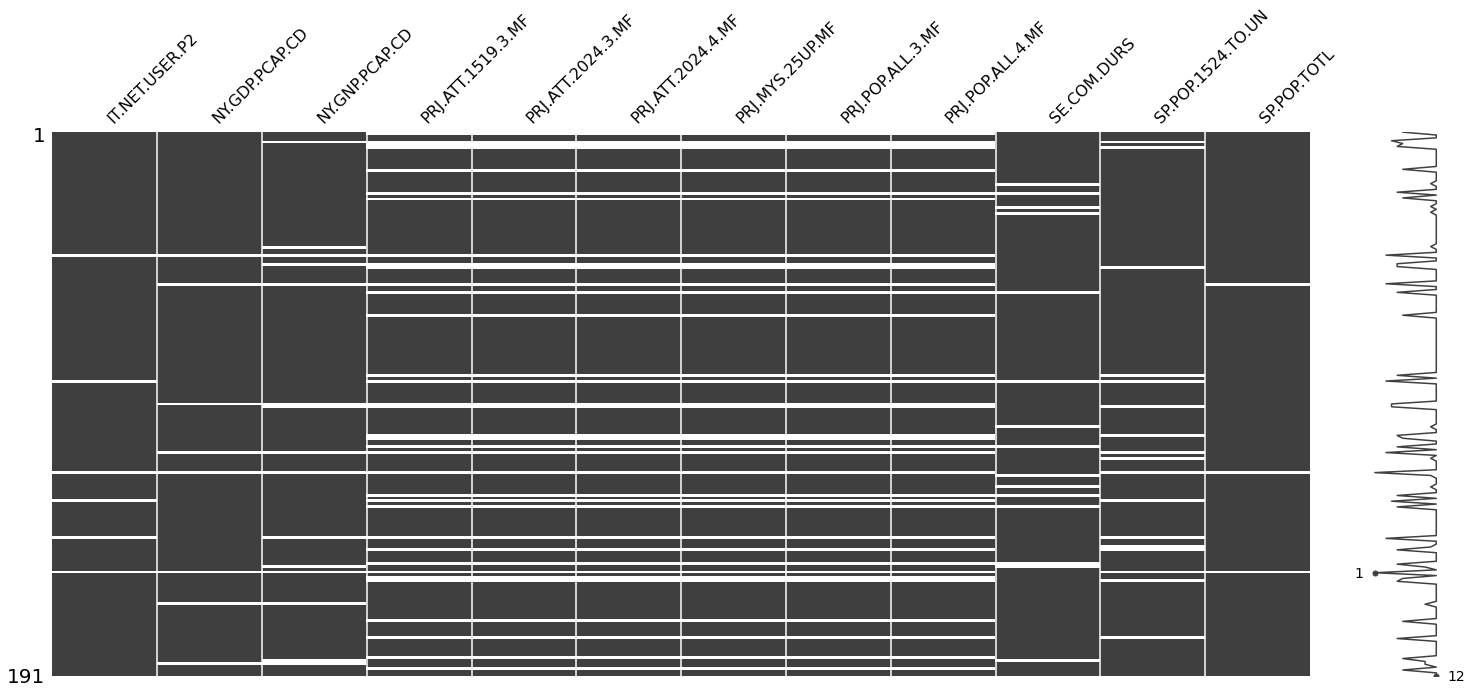

In [6]:
idh = data_idh.pivot_table(values='2015',index=['Short Name'] , columns=['Indicator Code']) #Table Pivot sur l'année 2015
msno.matrix(idh)

<AxesSubplot:>

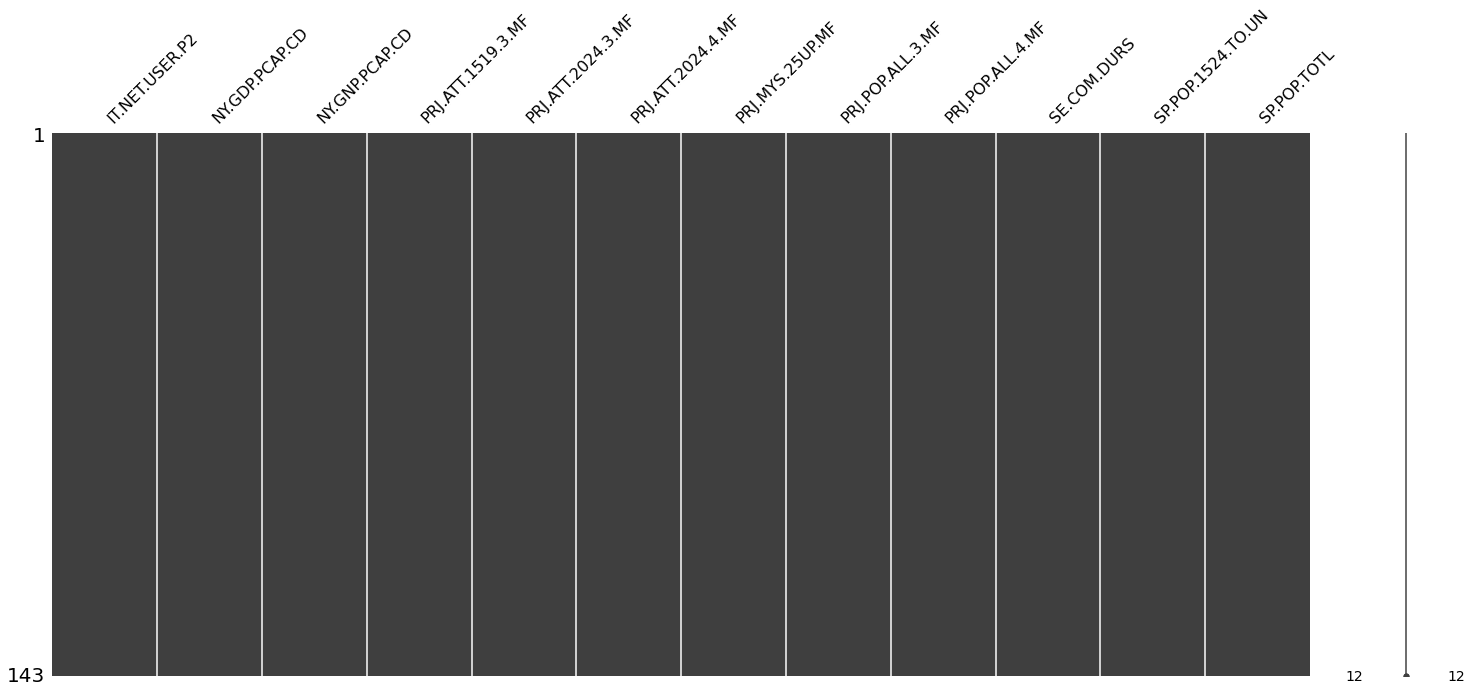

In [7]:
idh.dropna(inplace=True) #Suppression des lignes avec des valeurs manquantes
msno.matrix(idh)

Rennomage des colonnes

In [8]:
idh.rename(columns={
      "SP.POP.TOTL": "Population",
      "SE.COM.DURS": "Durée obl. scolarité",
      "NY.GDP.PCAP.CD" : "PIB par habitant",
      "NY.GNP.PCAP.CD" : "PNB par habitant",
      "SP.POP.1524.TO.UN": "Population 15-24",
      "SP.SEC.UTOT.IN": "Population lycée",
      "IT.NET.USER.P2": "Utilisateur internet",
      "PRJ.MYS.25UP.MF": "Moyenne d'années scolarisé",
      "PRJ.ATT.1519.3.MF": "% Pop 15-19 Lycée", 
      "PRJ.ATT.2024.3.MF": "% Pop 20-24 Lycée",
      "PRJ.ATT.2024.4.MF": "% Pop 20-24 Université",
      "PRJ.POP.ALL.3.MF" : "Pop att lycée",
      "PRJ.POP.ALL.4.MF" : "Pop att post sec"}, inplace=True)

In [9]:
idh

Indicator Code,Utilisateur internet,PIB par habitant,PNB par habitant,% Pop 15-19 Lycée,% Pop 20-24 Lycée,% Pop 20-24 Université,Moyenne d'années scolarisé,Pop att lycée,Pop att post sec,Durée obl. scolarité,Population 15-24,Population
Short Name,,,,,,,,,,,,
Albania,63.252933,3934.895394,4290.0,0.11,0.37,0.05,10.2,1030.33,218.90,9.0,556269.0,2.880703e+06
Algeria,38.200000,4160.220067,4800.0,0.42,0.33,0.22,8.7,8209.79,3441.06,10.0,6467818.0,3.987153e+07
Argentina,68.043064,13467.102357,12430.0,0.15,0.54,0.06,10.1,10117.63,4106.84,14.0,6886530.0,4.341776e+07
Armenia,59.102378,3617.935746,4030.0,0.53,0.74,0.16,10.5,1641.12,512.32,12.0,446958.0,2.916950e+06
Australia,84.560519,56554.038761,60330.0,0.64,0.64,0.27,12.3,8528.74,6276.89,10.0,2914620.0,2.378934e+07
Austria,83.940142,44255.583356,47610.0,0.19,0.56,0.28,12.3,3593.74,1817.25,9.0,964629.0,8.633169e+06
Azerbaijan,77.000000,5500.310382,6550.0,0.43,0.55,0.19,10.3,4804.83,1110.37,10.0,1544146.0,9.649341e+06
Bahrain,93.478301,22688.878244,22660.0,0.31,0.56,0.14,10.0,448.58,240.95,9.0,132609.0,1.371855e+06
Bangladesh,14.400000,1210.158769,1190.0,0.10,0.14,0.12,5.2,9392.84,9418.94,5.0,34400594.0,1.612009e+08


In [10]:
country_bis = un_countries[['Short Name','Region']]
idh =pd.merge(country_bis, idh, on="Short Name") #Association Table Pivot avec Region
idh["Moyenne d'années scolarisé"] = round(idh["Moyenne d'années scolarisé"]) #Arrondir les années
idh["% Pop 20-24 Université"] = idh["% Pop 20-24 Université"]*100 #Mettre en %
idh["% Pop 20-24 Lycée"] = idh["% Pop 20-24 Lycée"]*100 #Mettre en %
idh["% Pop 15-19 Lycée"] = idh["% Pop 15-19 Lycée"]*100 #Mettre en %

In [11]:
idh.describe()

,Utilisateur internet,PIB par habitant,PNB par habitant,% Pop 15-19 Lycée,% Pop 20-24 Lycée,% Pop 20-24 Université,Moyenne d'années scolarisé,Pop att lycée,Pop att post sec,Durée obl. scolarité,Population 15-24,Population
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02
mean,49.813842,14228.077901,14888.951049,21.720280,40.762238,13.454545,8.881119,9611.283566,4887.022657,9.538462,7.899287e+06,4.832249e+07
std,28.066305,18964.706822,19537.975723,17.035343,24.074403,12.436162,2.960989,28935.858140,14144.392325,2.363958,2.690513e+07,1.623711e+08
min,3.500000,348.381417,340.000000,0.000000,2.000000,0.000000,2.000000,10.370000,8.240000,5.000000,2.014200e+04,1.063640e+05
25%,22.359443,2101.489708,2005.000000,7.500000,20.500000,5.000000,7.000000,423.400000,220.455000,8.000000,5.311225e+05,3.545034e+06
50%,51.205425,5814.863134,6100.000000,19.000000,40.000000,11.000000,10.000000,1735.930000,848.740000,9.000000,1.411616e+06,9.843028e+06
75%,73.254350,17518.702234,18215.000000,31.000000,59.500000,19.000000,11.000000,6453.370000,3335.320000,11.000000,5.569034e+06,3.705103e+07
max,98.200000,101446.786303,93860.000000,73.000000,93.000000,76.000000,14.000000,231654.010000,107118.130000,15.000000,2.441202e+08,1.371220e+09


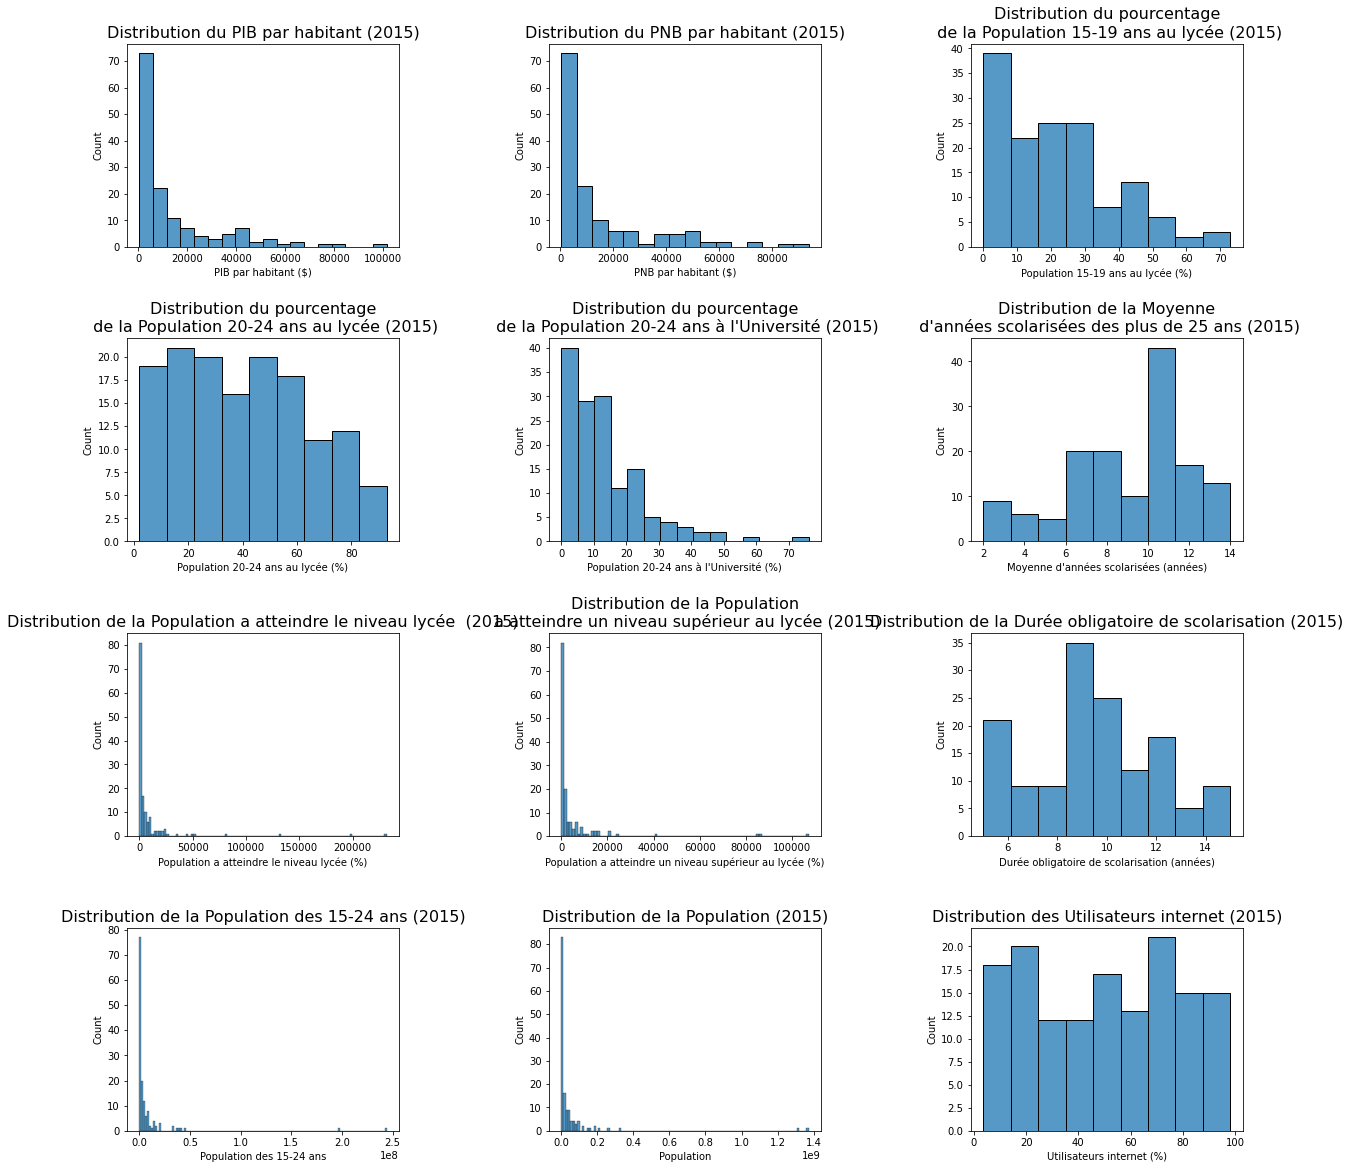

In [12]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.histplot(idh, x="PIB par habitant")
plt.xlabel("PIB par habitant ($)")
plt.title("Distribution du PIB par habitant (2015)", fontsize=16)

plt.subplot(4,3,2)
sns.histplot(idh, x="PNB par habitant")
plt.xlabel("PNB par habitant ($)")
plt.title("Distribution du PNB par habitant (2015)", fontsize=16)

plt.subplot(4,3,3)
sns.histplot(idh, x="% Pop 15-19 Lycée")
plt.xlabel("Population 15-19 ans au lycée (%)")
plt.title("Distribution du pourcentage\n de la Population 15-19 ans au lycée (2015)", fontsize=16)

plt.subplot(4,3,4)
sns.histplot(idh, x="% Pop 20-24 Lycée")
plt.xlabel("Population 20-24 ans au lycée (%)")
plt.title("Distribution du pourcentage\n de la Population 20-24 ans au lycée (2015)", fontsize=16)

plt.subplot(4,3,5)
sns.histplot(idh, x="% Pop 20-24 Université")
plt.xlabel("Population 20-24 ans à l'Université (%)")
plt.title("Distribution du pourcentage\n de la Population 20-24 ans à l'Université (2015)", fontsize=16)

plt.subplot(4,3,6)
sns.histplot(idh, x="Moyenne d'années scolarisé")
plt.xlabel("Moyenne d'années scolarisées (années)")
plt.title("Distribution de la Moyenne\n d'années scolarisées des plus de 25 ans (2015)", fontsize=16)

plt.subplot(4,3,7)
sns.histplot(idh, x="Pop att lycée")
plt.xlabel("Population a atteindre le niveau lycée (%)")
plt.title("Distribution de la Population a atteindre le niveau lycée  (2015)", fontsize=16)

plt.subplot(4,3,8)
sns.histplot(idh, x="Pop att post sec")
plt.xlabel("Population a atteindre un niveau supérieur au lycée (%)")
plt.title("Distribution de la Population\n a atteindre un niveau supérieur au lycée (2015)", fontsize=16)

plt.subplot(4,3,9)
sns.histplot(idh, x="Durée obl. scolarité")
plt.xlabel("Durée obligatoire de scolarisation (années)")
plt.title("Distribution de la Durée obligatoire de scolarisation (2015)", fontsize=16)

plt.subplot(4,3,10)
sns.histplot(idh, x="Population 15-24")
plt.xlabel("Population des 15-24 ans")
plt.title("Distribution de la Population des 15-24 ans (2015)", fontsize=16)

plt.subplot(4,3,11)
sns.histplot(idh, x="Population")
plt.xlabel("Population")
plt.title("Distribution de la Population (2015)", fontsize=16)

plt.subplot(4,3,12)
sns.histplot(idh, x="Utilisateur internet")
plt.xlabel("Utilisateurs internet (%)")
plt.title("Distribution des Utilisateurs internet (2015)", fontsize=16)

plt.subplots_adjust(hspace=0.45,wspace=0.55)
plt.savefig("./Visualisations/Dispersion variable", bbox_inches='tight')
plt.show()

Visualisation corrélations de Pearson des indicateurs

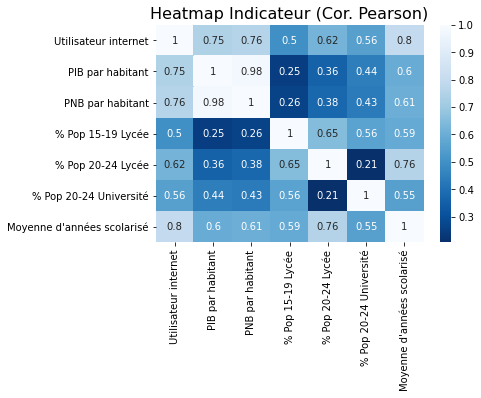

In [13]:
idh_cor =idh.drop(["Pop att lycée","Pop att post sec","Durée obl. scolarité","Population 15-24","Population"], axis =1).corr()
sns.heatmap(idh_cor, annot=True, cmap="Blues_r")
plt.title("Heatmap Indicateur (Cor. Pearson)", fontsize=16)
plt.savefig("./Visualisations/Heatmap Indicateur.png", bbox_inches='tight')

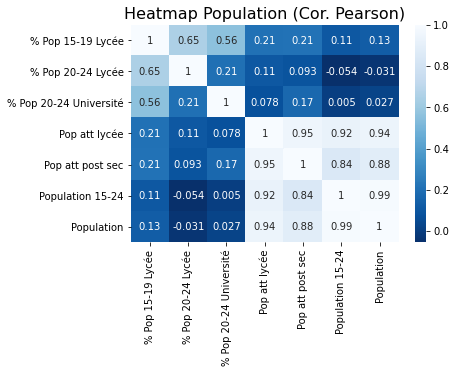

In [14]:
idh_corb = idh[["% Pop 15-19 Lycée","% Pop 20-24 Lycée","% Pop 20-24 Université","Pop att lycée","Pop att post sec","Population 15-24","Population"]].corr()
sns.heatmap(idh_corb, annot=True, cmap="Blues_r")
plt.title("Heatmap Population (Cor. Pearson)", fontsize=16)
plt.savefig("./Visualisations/Heatmap Population", bbox_inches='tight')

Affinage filtrage

- Pays avec 80% d'utilisateur internet
- Pays avec une moyennes d'années de scolarisation supérieur ou égal à la durée obligatoire de scolarisation

<AxesSubplot:>

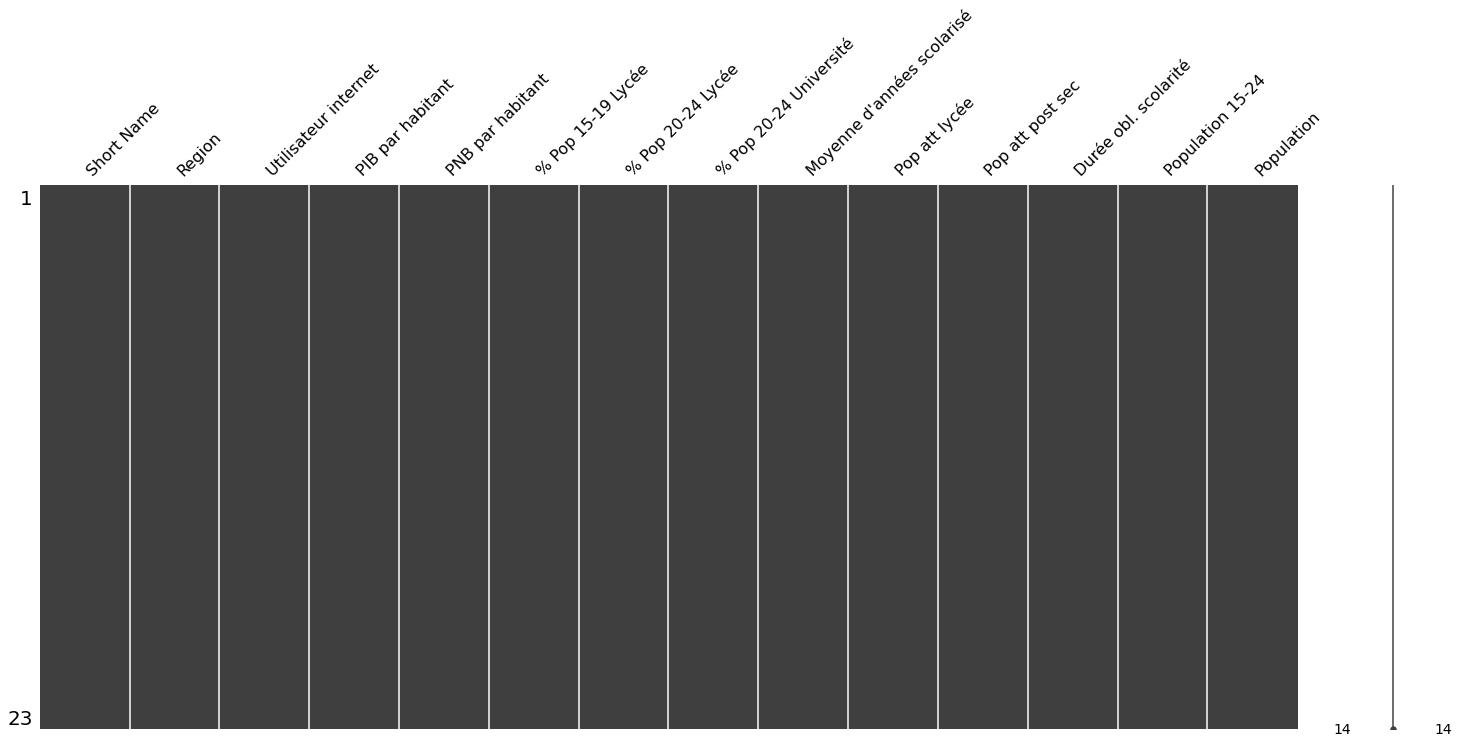

In [15]:
fil = idh.loc[(idh["Utilisateur internet"] > 80) & (idh["Moyenne d'années scolarisé"] >= idh["Durée obl. scolarité"])]
msno.matrix(fil)

In [16]:
fil

,Short Name,Region,Utilisateur internet,PIB par habitant,PNB par habitant,% Pop 15-19 Lycée,% Pop 20-24 Lycée,% Pop 20-24 Université,Moyenne d'années scolarisé,Pop att lycée,Pop att post sec,Durée obl. scolarité,Population 15-24,Population
1,United Arab Emirates,Middle East & North Africa,90.500000,39101.746890,42910.0,47.0,51.0,10.0,10.0,2768.80,1315.87,6.0,743608.0,9154302.0
4,Australia,East Asia & Pacific,84.560519,56554.038761,60330.0,64.0,64.0,27.0,12.0,8528.74,6276.89,10.0,2914620.0,23789338.0
5,Austria,Europe & Central Asia,83.940142,44255.583356,47610.0,19.0,56.0,28.0,12.0,3593.74,1817.25,9.0,964629.0,8633169.0
7,Belgium,Europe & Central Asia,85.052900,40375.388639,44340.0,38.0,53.0,39.0,12.0,2973.51,3107.79,12.0,1241946.0,11274196.0
12,Bahrain,Middle East & North Africa,93.478301,22688.878244,22660.0,31.0,56.0,14.0,10.0,448.58,240.95,9.0,132609.0,1371855.0
20,Canada,North America,88.470000,43315.700442,47250.0,68.0,53.0,43.0,14.0,10693.52,15821.87,10.0,4373511.0,35848610.0
21,Switzerland,Europe & Central Asia,87.479056,82016.021313,84570.0,12.0,77.0,6.0,13.0,3501.45,1497.83,12.0,959002.0,8282396.0
33,Germany,Europe & Central Asia,87.589800,41323.921502,45790.0,8.0,63.0,13.0,14.0,34849.15,20957.98,12.0,8682394.0,81686611.0
34,Denmark,Europe & Central Asia,96.330500,53012.996584,60300.0,7.0,70.0,4.0,12.0,2133.33,1084.90,10.0,710024.0,5683483.0
40,Estonia,Europe & Central Asia,88.411812,17155.874176,18300.0,19.0,61.0,19.0,13.0,530.85,373.97,9.0,138228.0,1315407.0


### Visualisations

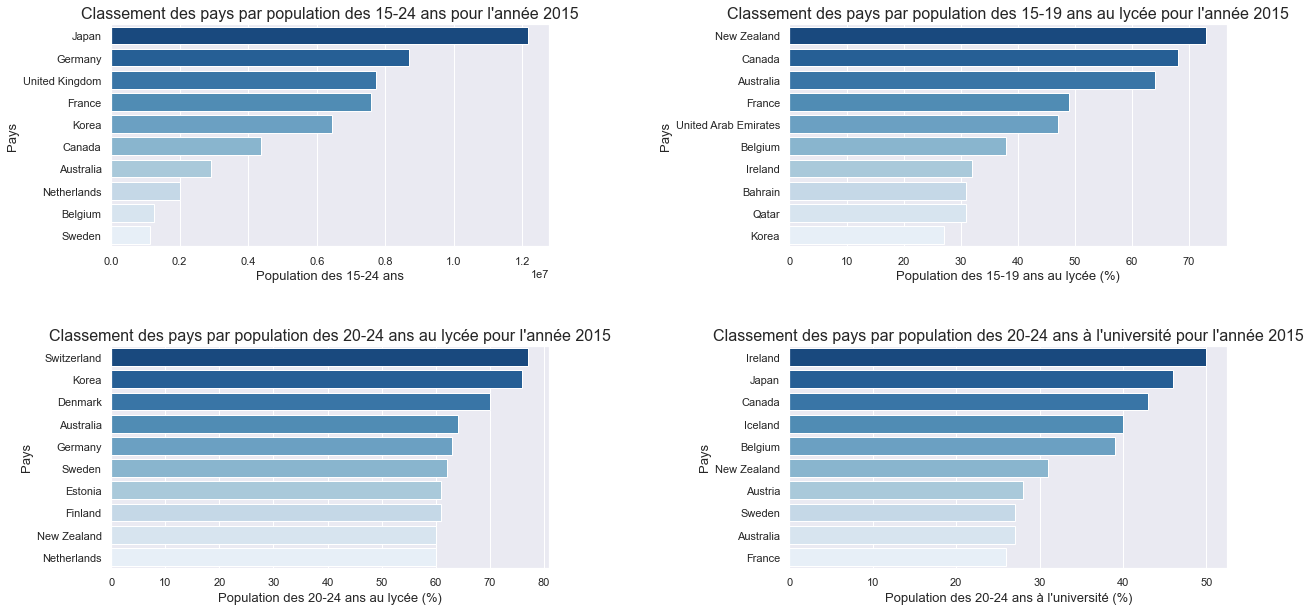

In [17]:
plt.figure(figsize=(20,10))
sns.set_theme()
plt.subplot(2,2,1)
sns.barplot(data= fil.sort_values(by="Population 15-24", ascending=False).head(10), x="Population 15-24", y="Short Name" ,palette ="Blues_r")
plt.ylabel('Pays', fontsize=13)
plt.xlabel('Population des 15-24 ans', fontsize=13)
plt.title("Classement des pays par population des 15-24 ans pour l'année 2015", fontsize=16)


plt.subplot(2,2,2)
sns.barplot(data= fil.sort_values(by="% Pop 15-19 Lycée", ascending=False).head(10), x="% Pop 15-19 Lycée", y="Short Name",palette ="Blues_r" )
plt.ylabel('Pays', fontsize=13)
plt.xlabel('Population des 15-19 ans au lycée (%)', fontsize=13)
plt.title("Classement des pays par population des 15-19 ans au lycée pour l'année 2015", fontsize=16)

plt.subplot(2,2,3)
sns.barplot(data= fil.sort_values(by="% Pop 20-24 Lycée", ascending=False).head(10), x="% Pop 20-24 Lycée", y="Short Name",palette ="Blues_r" )
plt.ylabel('Pays', fontsize=13)
plt.xlabel('Population des 20-24 ans au lycée (%)', fontsize=13)
plt.title("Classement des pays par population des 20-24 ans au lycée pour l'année 2015", fontsize=16)

plt.subplot(2,2,4)
sns.barplot(data= fil.sort_values(by="% Pop 20-24 Université", ascending=False).head(10), x="% Pop 20-24 Université", y="Short Name",palette ="Blues_r" )
plt.ylabel('Pays', fontsize=13)
plt.xlabel("Population des 20-24 ans à l'université (%)", fontsize=13)
plt.title("Classement des pays par population des 20-24 ans à l'université pour l'année 2015", fontsize=16)

plt.subplots_adjust(hspace=0.45,wspace=0.55)
plt.savefig("./Visualisations/Classement pays Population 15-24 ans", bbox_inches='tight')
plt.show()

Choix des pays par Population des 15-24 ans

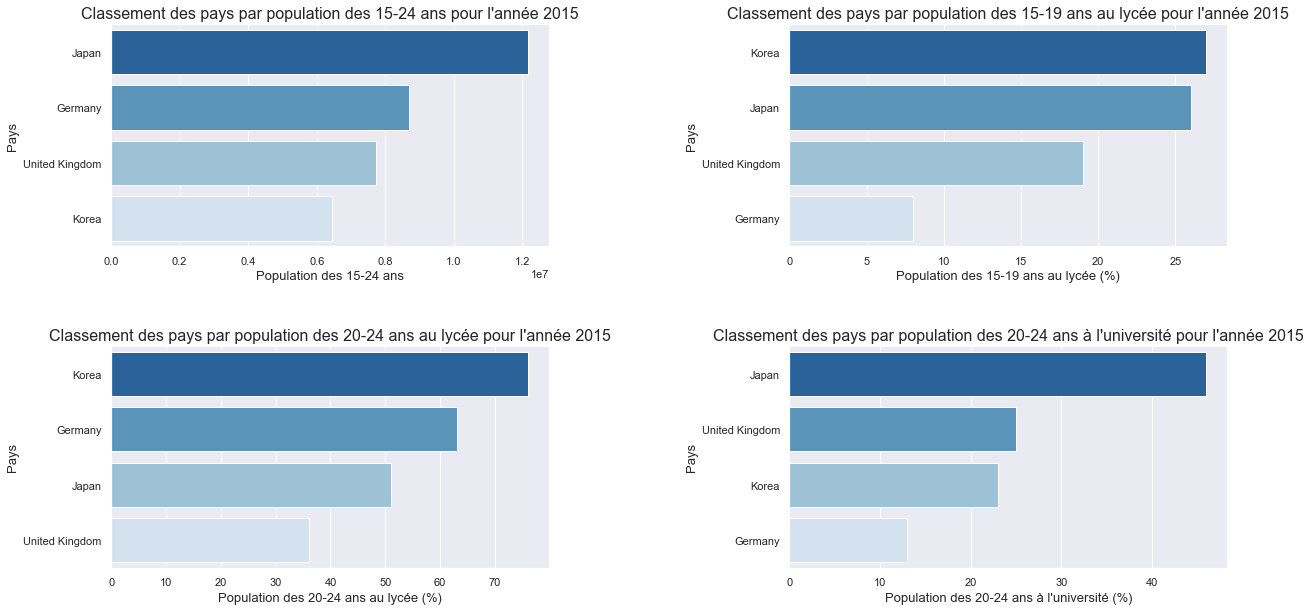

In [18]:
choix = fil.loc[fil["Short Name"].isin(["Japan","Germany","Korea", "United Kingdom"])]

plt.figure(figsize=(20,10))
sns.set_theme()
plt.subplot(2,2,1)
sns.barplot(data= choix.sort_values(by="Population 15-24", ascending=False).head(10), x="Population 15-24", y="Short Name",palette ="Blues_r" )
plt.ylabel('Pays', fontsize=13)
plt.xlabel('Population des 15-24 ans', fontsize=13)
plt.title("Classement des pays par population des 15-24 ans pour l'année 2015", fontsize=16)

plt.subplot(2,2,2)
sns.barplot(data= choix.sort_values(by="% Pop 15-19 Lycée", ascending=False).head(10), x="% Pop 15-19 Lycée", y="Short Name",palette ="Blues_r" )
plt.ylabel('Pays', fontsize=13)
plt.xlabel('Population des 15-19 ans au lycée (%)', fontsize=13)
plt.title("Classement des pays par population des 15-19 ans au lycée pour l'année 2015", fontsize=16)

plt.subplot(2,2,3)
sns.barplot(data= choix.sort_values(by="% Pop 20-24 Lycée", ascending=False).head(10), x="% Pop 20-24 Lycée", y="Short Name" ,palette ="Blues_r")
plt.ylabel('Pays', fontsize=13)
plt.xlabel('Population des 20-24 ans au lycée (%)', fontsize=13)
plt.title("Classement des pays par population des 20-24 ans au lycée pour l'année 2015", fontsize=16)

plt.subplot(2,2,4)
sns.barplot(data= choix.sort_values(by="% Pop 20-24 Université", ascending=False).head(10), x="% Pop 20-24 Université", y="Short Name" ,palette ="Blues_r")
plt.ylabel('Pays', fontsize=13)
plt.xlabel("Population des 20-24 ans à l'université (%)", fontsize=13)
plt.title("Classement des pays par population des 20-24 ans à l'université pour l'année 2015", fontsize=16)

plt.subplots_adjust(hspace=0.45,wspace=0.55)
plt.savefig("./Visualisations/Classement pays choisie Population 15-24 ans", bbox_inches='tight')
plt.show()

### Analyse données historiques des pays

<ipython-input-19-a9f6519de367>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist.dropna(thresh=(0.5*hist.shape[0]), axis=1, inplace =True)


<AxesSubplot:>

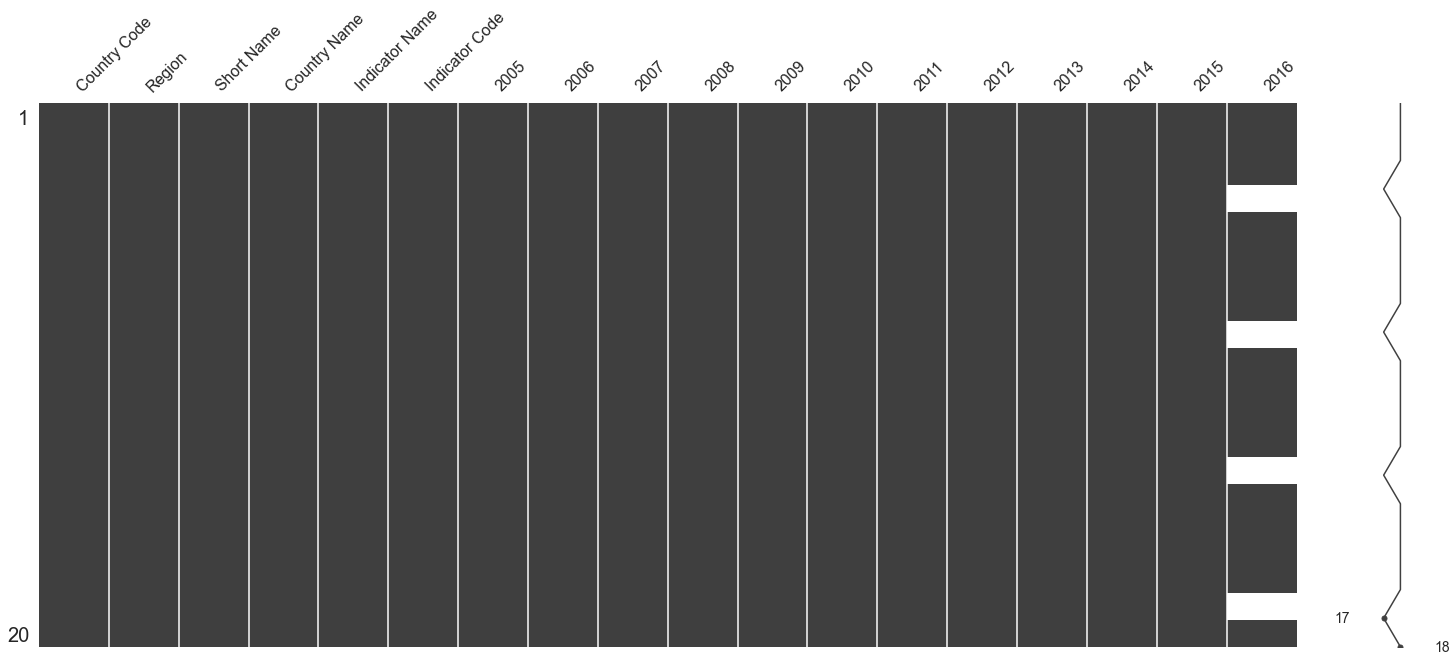

In [19]:
ind_hist=["SP.POP.TOTL","SP.POP.1524.TO.UN","NY.GDP.PCAP.CD","NY.GNP.PCAP.CD","IT.NET.USER.P2"]

hist = data_idh.loc[data_idh["Short Name"].isin(["Japan","Germany","United Kingdom","Korea"]) 
                    & data_idh["Indicator Code"].isin(ind_hist)]
hist.dropna(thresh=(0.5*hist.shape[0]), axis=1, inplace =True)
msno.matrix(hist)

Fonction préparation des données

In [20]:
def prepare(df):
    df.set_index(["Short Name"], inplace=True) 
    df = df.T #Transposition du dataframe
    df.drop(["Indicator Code","Indicator Name","Region","Country Code","Country Name"],axis=0, inplace=True)
    df = df[["Japan","Germany","Korea", "United Kingdom"]].astype(float) #Conversion des colonnes
    return df

Affichage des données historiques

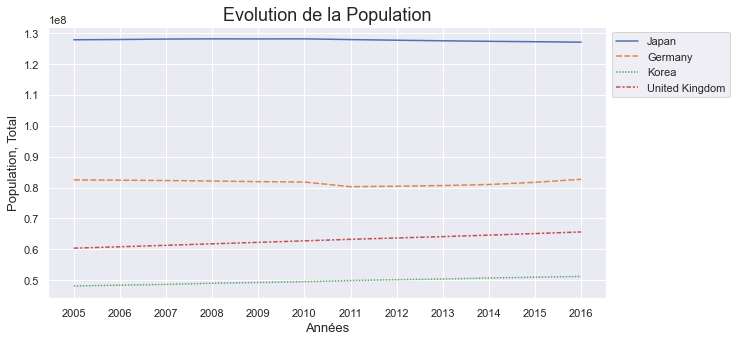

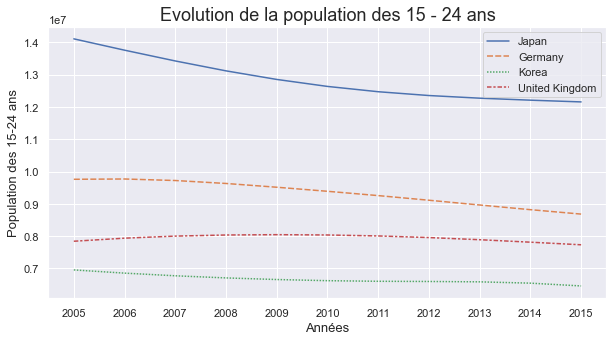

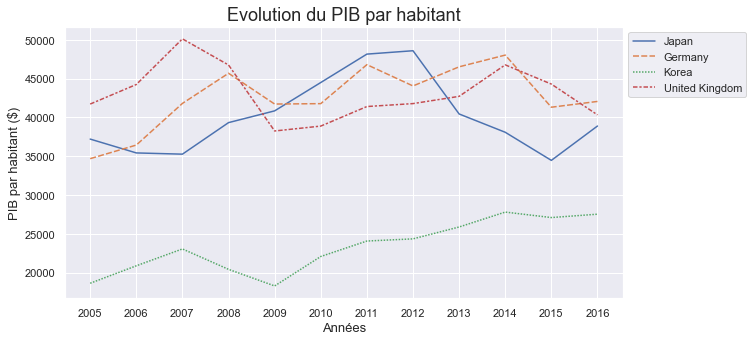

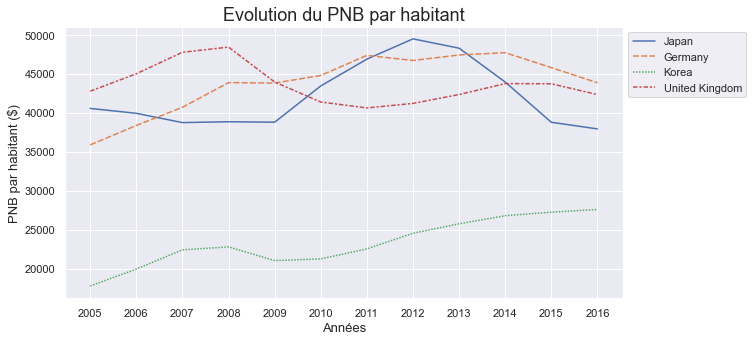

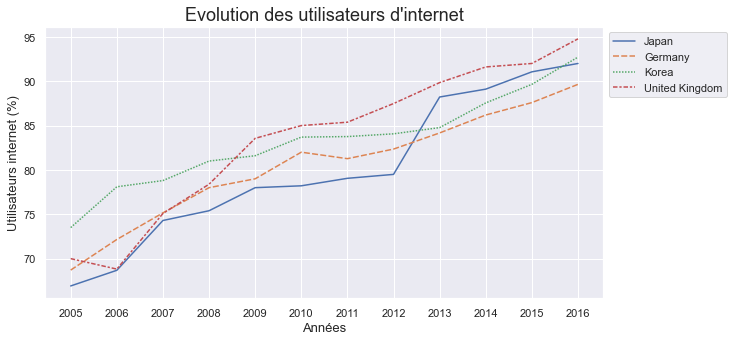

In [21]:
for n in ind_hist:
    daf = hist.loc[hist["Indicator Code"] == n]
    daf =prepare(daf)
    
    if n == "SP.POP.TOTL":
        y = "Population, Total"
        title = "Evolution de la Population"
    elif n == "SP.POP.1524.TO.UN":
        y = "Population des 15-24 ans"
        title = "Evolution de la population des 15 - 24 ans"
    elif n == "NY.GDP.PCAP.CD":
        y = "PIB par habitant ($)"
        title = "Evolution du PIB par habitant"
    elif n == "NY.GNP.PCAP.CD":
        y = "PNB par habitant ($)"
        title = "Evolution du PNB par habitant"
    elif n == "IT.NET.USER.P2":
        y = "Utilisateurs internet (%)"
        title = "Evolution des utilisateurs d'internet"
        
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=daf)
    plt.ylabel(y, fontsize=13)
    plt.xlabel("Années", fontsize=13)
    plt.title(title , fontsize=18)
    plt.legend(bbox_to_anchor=(1, 1))
    titre = "./Visualisations/"+title
    plt.savefig(titre, bbox_inches='tight')
    plt.show()
    

### Analyse données de projection des pays

<ipython-input-22-23420d6a5300>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prj.dropna(thresh=(0.5*hist.shape[0]), axis=1, inplace =True)


<AxesSubplot:>

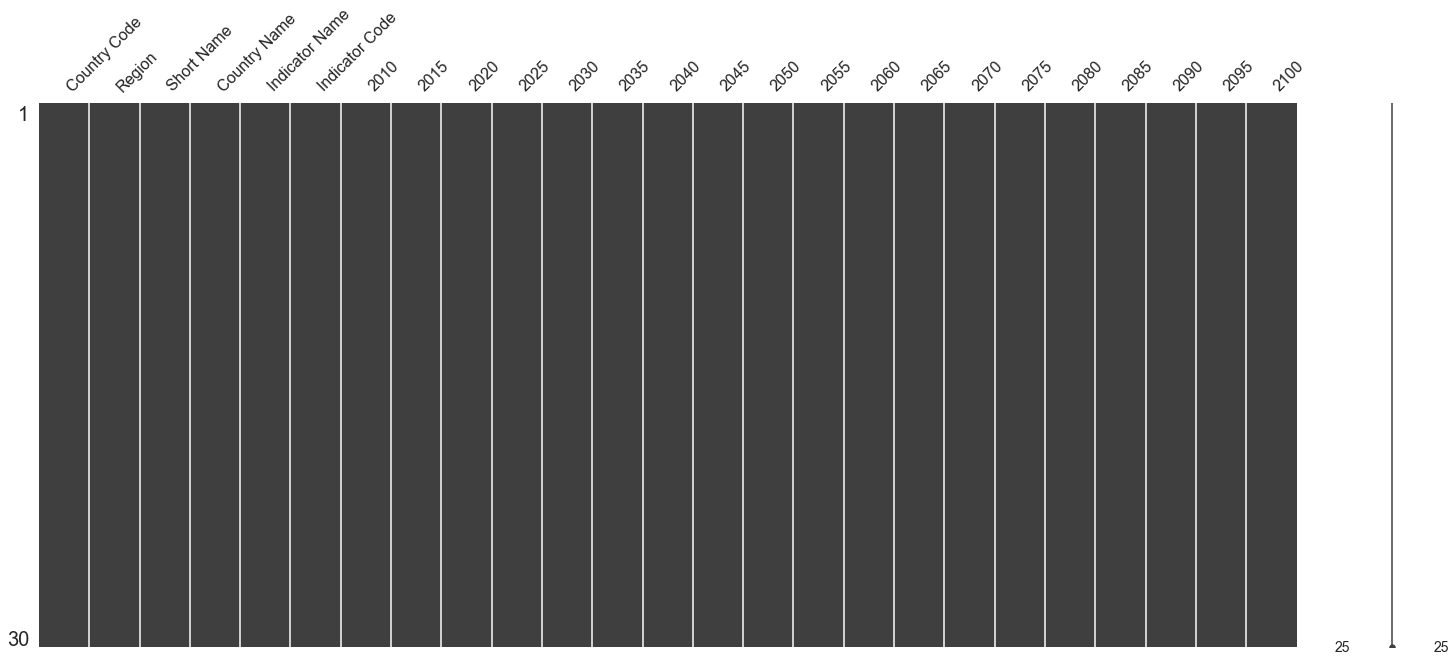

In [22]:
ind_prj=[ "PRJ.MYS.25UP.MF", "PRJ.ATT.1519.3.MF", "PRJ.ATT.2024.3.MF","PRJ.ATT.2024.4.MF","PRJ.POP.ALL.3.MF","PRJ.POP.ALL.4.MF"]

prj = data_idh.loc[data_idh["Short Name"].isin(["Japan","Germany","Korea","United Kingdom", "Canada"]) 
                    & data_idh["Indicator Code"].isin(ind_prj)]
prj.dropna(thresh=(0.5*hist.shape[0]), axis=1, inplace =True)
msno.matrix(prj)

Affichage des données de projection

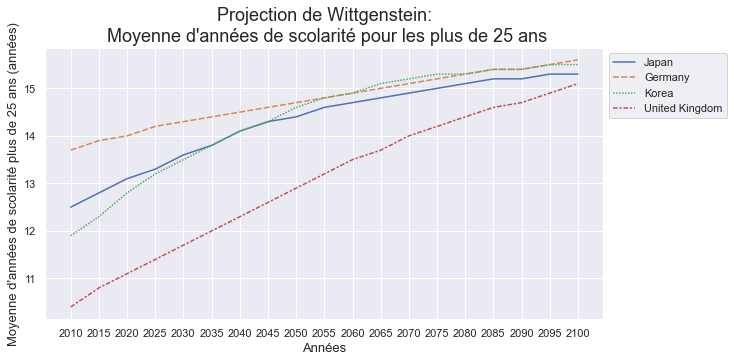

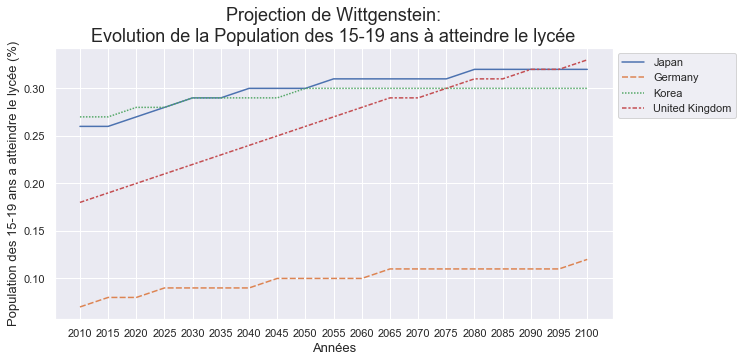

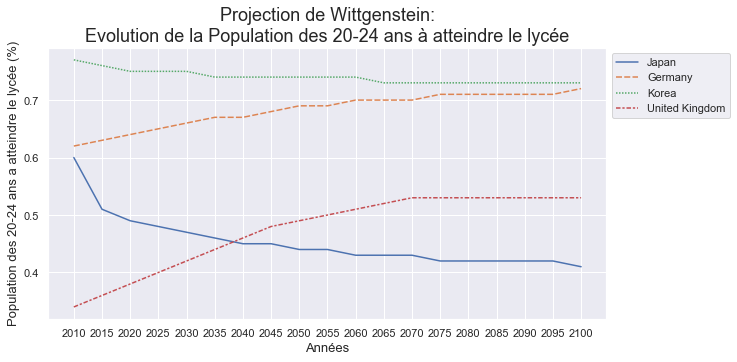

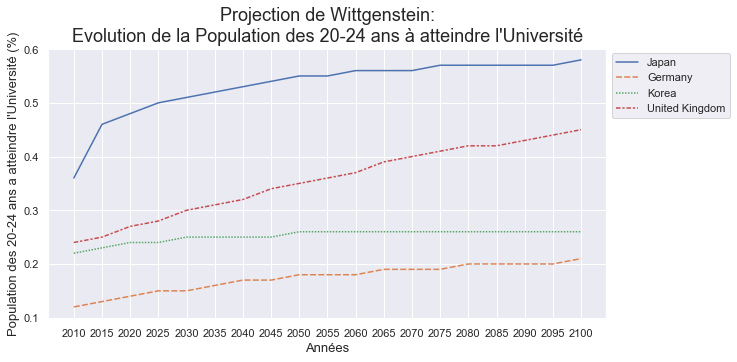

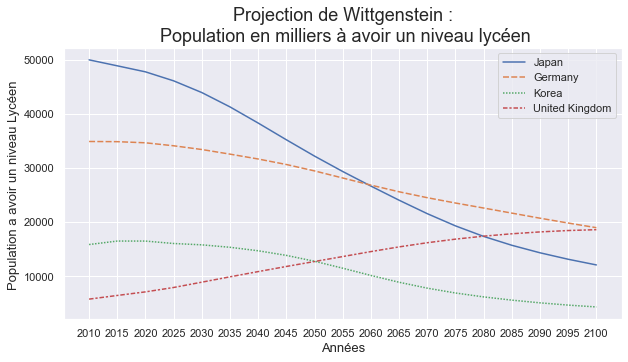

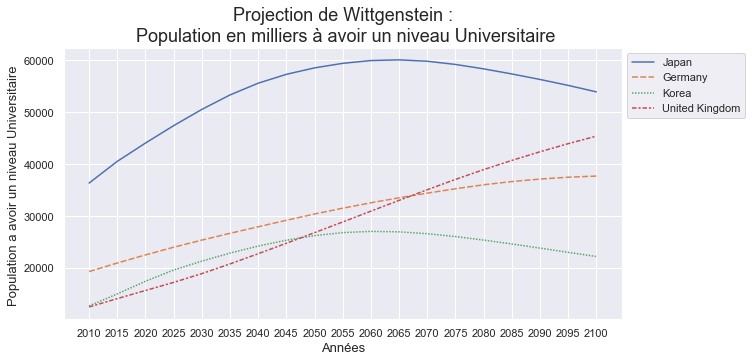

In [23]:
for f in ind_prj:
    dap = prj.loc[prj["Indicator Code"] == f]
    dap =prepare(dap)
    
    if f == "PRJ.MYS.25UP.MF":
        y = "Moyenne d'années de scolarité plus de 25 ans (années)"
        title = "Projection de Wittgenstein:\n Moyenne d'années de scolarité pour les plus de 25 ans"
        titre = "./Visualisations/Projection de Wittgenstein - Moyenne d'années de scolarité pour les plus de 25 ans"
    elif f == "PRJ.ATT.1519.3.MF":
        y = "Population des 15-19 ans a atteindre le lycée (%)"
        title = "Projection de Wittgenstein:\nEvolution de la Population des 15-19 ans à atteindre le lycée"
        titre = "./Visualisations/Projection de Wittgenstein - Evolution de la Population des 15-19 ans à atteindre le lycée"
    elif f == "PRJ.ATT.2024.3.MF":
        y = "Population des 20-24 ans a atteindre le lycée (%)"
        title = "Projection de Wittgenstein:\nEvolution de la Population des 20-24 ans à atteindre le lycée"
        titre = "./Visualisations/Projection de Wittgenstein - Evolution de la Population des 20-24 ans à atteindre le lycée"
    elif f == "PRJ.ATT.2024.4.MF":
        y = "Population des 20-24 ans a atteindre l'Université (%)"
        title = "Projection de Wittgenstein:\nEvolution de la Population des 20-24 ans à atteindre l'Université"
        titre = "./Visualisations/Projection de Wittgenstein - Evolution de la Population des 20-24 ans à atteindre l'Université"
    elif f == "PRJ.POP.ALL.3.MF":
        y = "Population a avoir un niveau Lycéen "
        title = "Projection de Wittgenstein :\n Population en milliers à avoir un niveau lycéen"
        titre = "./Visualisations/Projection de Wittgenstein - Population en milliers à avoir un niveau lycéen"
    else:
        y = "Population a avoir un niveau Universitaire "
        title = "Projection de Wittgenstein :\n Population en milliers à avoir un niveau Universitaire"
        titre = "./Visualisations/Projection de Wittgenstein - Population en milliers à avoir un niveau Universitaire"
        
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=dap)
    plt.ylabel(y, fontsize=13)
    plt.xlabel("Années", fontsize=13)
    plt.title(title, fontsize=18)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.savefig(titre, bbox_inches='tight')
    plt.show()

In [24]:
fil.to_csv("./Data/DataFiltré2015.csv")
hist.to_csv("./Data/DataHistFiltre.csv")
prj.to_csv("./Data/DataProjFiltre.csv")